In [2]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl (2.1 kB)
Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.16.1-cp311-cp31

In [100]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import MaxPooling2D
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [47]:
size = [224, 224]

In [48]:
vgg19=VGG19(input_shape= size + [3], weights='imagenet', include_top=False)

In [49]:
vgg19.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
for layer in vgg19.layers:
    layer.trainable = False

In [51]:
folder = glob("C:/Users/vadda/OneDrive/Desktop/plit_data/train/*")

In [52]:
folder

['C:/Users/vadda/OneDrive/Desktop/plit_data/train\\Parasitized',
 'C:/Users/vadda/OneDrive/Desktop/plit_data/train\\Uninfected']

In [76]:
x=Flatten()(vgg19.output)

In [70]:
prediction = Dense(len(folder), activation="softmax")(x)
model= Model(inputs=vgg19.input, outputs=prediction)

In [71]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

In [64]:
train_gen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_gen = ImageDataGenerator(rescale = 1./255)

In [73]:
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,074,562 (76.58 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [65]:
train_set = train_gen.flow_from_directory("C:/Users/vadda/OneDrive/Desktop/plit_data/train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1600 images belonging to 2 classes.


In [66]:
train_set

In [67]:
test_set=test_gen.flow_from_directory("C:/Users/vadda/OneDrive/Desktop/plit_data/test",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 400 images belonging to 2 classes.


In [78]:
r = model.fit(
  train_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=50,
  validation_steps=13)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 531s 11s/step - accuracy: 0.8079 - loss: 0.4293 - val_accuracy: 0.7825 - val_loss: 0.4277
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 539s 11s/step - accuracy: 0.8302 - loss: 0.3894 - val_accuracy: 0.8225 - val_loss: 0.3551
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 543s 11s/step - accuracy: 0.8260 - loss: 0.3851 - val_accuracy: 0.7675 - val_loss: 0.4501
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 542s 11s/step - accuracy: 0.8604 - loss: 0.3212 - val_accuracy: 0.7825 - val_loss: 0.4961
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accu

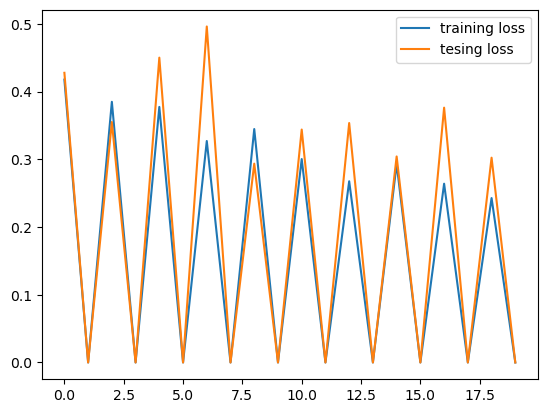

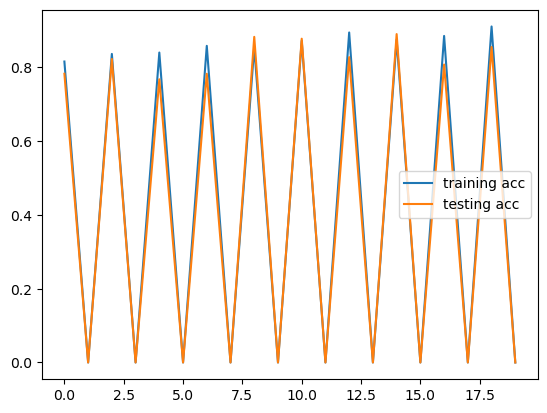

<Figure size 640x480 with 0 Axes>

In [79]:
plt.plot(r.history['loss'], label='training loss')
plt.plot(r.history['val_loss'], label='tesing loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='training acc')
plt.plot(r.history['val_accuracy'], label='testing acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [82]:
from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [83]:
y_pred = model.predict(test_set)
y_pred

13/13 ━━━━━━━━━━━━━━━━━━━━ 114s 9s/step


array([[3.82844567e-01, 6.17155492e-01],
       [2.23844387e-02, 9.77615535e-01],
       [5.24798892e-02, 9.47520137e-01],
       [4.45744038e-01, 5.54255903e-01],
       [3.26623559e-01, 6.73376441e-01],
       [5.08197509e-02, 9.49180245e-01],
       [1.00000000e+00, 2.65878985e-11],
       [8.39407265e-01, 1.60592765e-01],
       [4.26299185e-01, 5.73700845e-01],
       [1.07576564e-01, 8.92423451e-01],
       [5.91201894e-02, 9.40879822e-01],
       [9.94112790e-01, 5.88718569e-03],
       [4.93060321e-01, 5.06939709e-01],
       [7.35124767e-01, 2.64875263e-01],
       [5.64171374e-01, 4.35828626e-01],
       [4.78874475e-01, 5.21125495e-01],
       [1.27743781e-01, 8.72256160e-01],
       [1.23116530e-01, 8.76883507e-01],
       [7.50915349e-01, 2.49084711e-01],
       [5.34641445e-01, 4.65358496e-01],
       [5.23575358e-02, 9.47642505e-01],
       [1.76232472e-01, 8.23767483e-01],
       [8.99899185e-01, 1.00100800e-01],
       [1.15338869e-01, 8.84661138e-01],
       [8.048445

In [84]:
import numpy as np

In [85]:
y_pred = np.argmax(y_pred, axis=1)

In [88]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [89]:
from tensorflow.keras.preprocessing import image


In [92]:
img=image.load_img(,target_size=(224,224))
x=image.img_to_array(img)
x=x/255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)


In [94]:
pred=np.argmax(model.predict(img_data),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step


In [95]:
pred

array([1], dtype=int64)

In [98]:
loss, accuracy = model.evaluate(test_set, steps=len(test_set))

13/13 ━━━━━━━━━━━━━━━━━━━━ 78s 6s/step - accuracy: 0.8632 - loss: 0.2949


# CNN sequential

In [101]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 16)   │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 32)   │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 56, 56, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 500)            │    25,088,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │         1,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,100,046 (95.75 MB)

 Trainable params: 25,100,046 (95.75 MB)

 Non-trainable params: 0 (0.00 B)

In [102]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [103]:
train_gen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_gen = ImageDataGenerator(rescale = 1./255)

In [106]:
train_set = train_gen.flow_from_directory("C:/Users/vadda/OneDrive/Desktop/plit_data/train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1600 images belonging to 2 classes.


In [107]:
test_set=test_gen.flow_from_directory("C:/Users/vadda/OneDrive/Desktop/plit_data/test",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 400 images belonging to 2 classes.


In [108]:
r = model.fit(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=50,
  validation_steps=13)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 49s 861ms/step - accuracy: 0.5020 - loss: 1.0751 - val_accuracy: 0.5450 - val_loss: 0.6725
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 655ms/step - accuracy: 0.5782 - loss: 0.6747 - val_accuracy: 0.6275 - val_loss: 0.6487
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 669ms/step - accuracy: 0.6004 - loss: 0.6607 - val_accuracy: 0.6250 - val_loss: 0.6454
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 735ms/step - accuracy: 0.6262 - loss: 0.6371 - val_accuracy: 0.6900 - val_loss: 0.6059
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step 

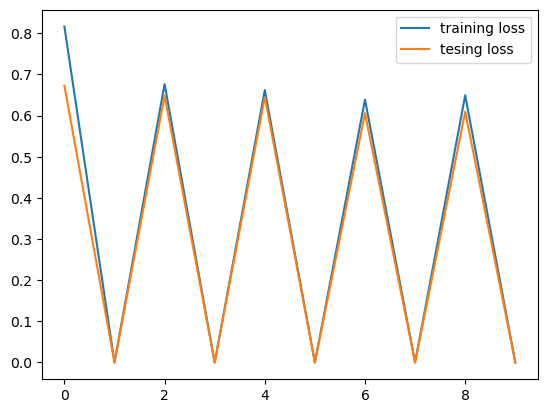

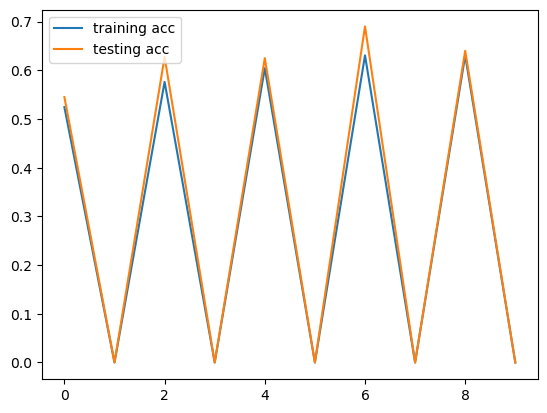

<Figure size 640x480 with 0 Axes>

In [109]:
plt.plot(r.history['loss'], label='training loss')
plt.plot(r.history['val_loss'], label='tesing loss')
plt.legend()
plt.show()
plt.savefig('sequential LossVal_loss')

plt.plot(r.history['accuracy'], label='training acc')
plt.plot(r.history['val_accuracy'], label='testing acc')
plt.legend()
plt.show()
plt.savefig('sequential AccVal_acc')

In [110]:
loss, accuracy = model.evaluate(test_set, steps=len(test_set))

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.6731 - loss: 0.5989


In [121]:
model=load_model("model_vgg19.h5")
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [127]:
img=image.load_img("C:/Users/vadda/OneDrive/Desktop/short data/Parasitized/C39P4thinF_original_IMG_20150622_105102_cell_83.png",target_size=(224,224))
x=image.img_to_array(img)
x=x/255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)


In [128]:
p=model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


In [129]:
p

array([[6.8441377e-09, 1.0000000e+00]], dtype=float32)